<img style="float: left;" src="http://emojis.slackmojis.com/emojis/images/1450694616/220/bananadance.gif?1450694616">

# The birthday problem

How many people do you need to get in the same room before it becomes more likely than not that two people in the room share a birthday? (Not the same year, just the same month/day).

The answer is pretty counterintuitive so my friend Shawn and I put this quick Monte Carlo together to solve the problem.

Basically, it takes far fewer people in a room to find a matching birthday than you would imagine: with **only 23** people in a room you are more likely than not to find that two people have the same birthday.

### How is this possible?
When there are 23 people in the room you actually can make **253** comparisons

$$ comparisons = \dfrac{23*22}{2}$$ 

So the probability that with 23 people in the room you'll have a match is

$$ probability = \Bigg(\dfrac{364}{365}\Bigg)^{253}$$ 

which is about 50%. With 23 people in the room you'll have a match 53% of the time. Go figure. The best way to think of this intuitively is that when you walk in a room you might compare your birthday to the other 23 people; you need to also consider the comparisons that every other person will make against the rest of the room. That's a lot of comparisons. 

Just to gut check ourselves, let's Monte Carlo this sucker. 

### What's a Monte Carlo simulation?
In case you're not familiar with Monte Carlo the general idea is that you create a scenario and test the result many, many times to try to determine a probability distribution. So, we will create a "room" full of `n` people and see whether that room has a matching birthday. In this case, we can build that same room 10,000 times (really we just need some arbitrarily large number). As we'll see, if we create a room with 23 people having random birthdays 10,000 times, in about 5,000 of those rooms do we find a match.

In [13]:
from datetime import datetime
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

Generate a birthday (an integer between 1 and 365)

In [14]:
def gen_bday():
    bday = random.randint(1,365)
    return bday

For each room size from 2 person to 50 people (call this `n`), try "building" the room with that number of people 10,000 times. For each of the 10,000 rooms built for a given `n` how many of those rooms have at least 2 people with the same birthday?

In [22]:
prob_dict = {}
for n in range(2, 50): 
    num_pers = n
    success_count = 0
    # run this 10000 per number of people in the room
    for e in range(0,10000):
        people = []
        for e in range(num_pers):
            people.append(gen_bday())
        # there was a match then the set should be smaller than this `people` list
        if len(people) > len(set(people)):
            success_count += 1
    prob_dict[n] = success_count/float(10000)

In [24]:
prob_dict

{2: 0.0024,
 3: 0.0084,
 4: 0.0179,
 5: 0.028,
 6: 0.0422,
 7: 0.0514,
 8: 0.0716,
 9: 0.094,
 10: 0.1159,
 11: 0.1426,
 12: 0.1612,
 13: 0.191,
 14: 0.2241,
 15: 0.2518,
 16: 0.2838,
 17: 0.3191,
 18: 0.3497,
 19: 0.3864,
 20: 0.4075,
 21: 0.4466,
 22: 0.4837,
 23: 0.5055,
 24: 0.5442,
 25: 0.5701,
 26: 0.5964,
 27: 0.6273,
 28: 0.6533,
 29: 0.6806,
 30: 0.7124,
 31: 0.729,
 32: 0.7606,
 33: 0.7725,
 34: 0.7986,
 35: 0.8209,
 36: 0.827,
 37: 0.8483,
 38: 0.8684,
 39: 0.8826,
 40: 0.8907,
 41: 0.9021,
 42: 0.9129,
 43: 0.9233,
 44: 0.9328,
 45: 0.939,
 46: 0.9465,
 47: 0.9561,
 48: 0.9613,
 49: 0.9648}

Let's plot the results and see how this actually looks

In [17]:
df = pd.Series(prob_dict)

In [20]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


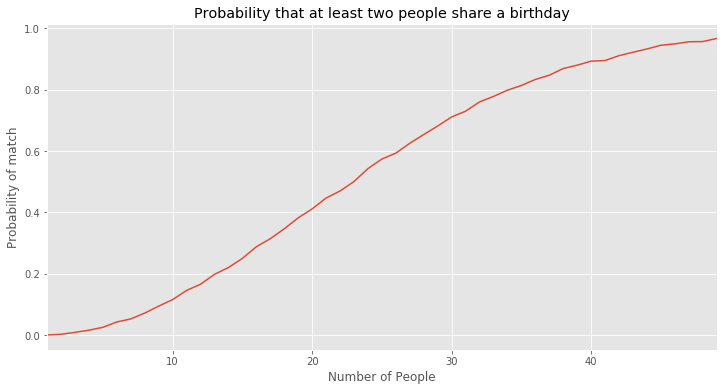

In [21]:
ax = df.plot(title='Probability that at least two people share a birthday', figsize=(12,6))
ax.set_xlabel("Number of People")
ax.set_ylabel("Probability of match")